In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("./Datasets/test.csv")
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [6]:
df.shape

(2947, 563)

In [9]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [10]:
data = df.drop(columns=['subject', 'Activity'])

In [11]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-0.2777081  -0.21063123  2.19307573 ... -0.40479042  0.62272321
  -0.0383485 ]
 [ 0.19865964  0.18259066 -0.25026383 ... -0.36173867  0.63673075
  -0.14570918]
 [ 0.02458676 -0.31805537 -0.22848456 ... -0.37093228  0.63284514
  -0.12685534]
 ...
 [ 1.25445818  1.86244113 -0.17318039 ... -0.27780151  0.61556116
   0.95227139]
 [-0.60108793  1.41138509  0.27812868 ... -0.28636876  0.58565426
   0.97869501]
 [-1.98758645 -0.02226443 -0.66991444 ... -0.28707909  0.58304691
   0.98093374]]


In [13]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_data)
print(x_pca)


[[-10.89051243  -2.53996585  -0.37474425]
 [-14.1371864   -1.38393936   0.74318637]
 [-15.41667541   1.97391002  -0.83097739]
 ...
 [ 12.99649707  -3.74652822  -4.4750246 ]
 [  9.01187467  -5.1896072   -4.83651369]
 [ 10.31977995  -4.95704818  -8.34010427]]


In [14]:
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])
print(pca.explained_variance_ratio_)

[0.51383815 0.05416388 0.02601101]


In [15]:
print("\nExplained Variance (Eigen values):")
print(pca.explained_variance_)
print("\nPrincipal Axes (components/Eigen Vectors):")
print(pca.components_)
print("\nMean of each feature before transformation:")
print(pca.mean_)


Explained Variance (Eigen values):
[288.36104876  30.39625284  14.59713064]

Principal Axes (components/Eigen Vectors):
[[ 0.00126007 -0.0035844  -0.00292111 ... -0.02353513  0.02631086
   0.02494988]
 [ 0.02007541  0.00362103 -0.00881586 ...  0.04950857 -0.05684445
  -0.04167217]
 [-0.00198456  0.00468785 -0.00064064 ... -0.02609243  0.01814914
  -0.05164219]]

Mean of each feature before transformation:
[ 6.20248113e-16 -9.16207124e-17 -1.19348033e-16 -4.82214276e-18
  4.82214276e-17 -1.22964640e-16 -1.56719640e-16  1.35019997e-16
 -1.33814462e-16 -3.85771421e-17  8.92096411e-17 -7.23321414e-17
  1.59130711e-16 -1.39842140e-16  1.95296782e-16  9.64428552e-18
  2.41107138e-17  8.96918553e-16  2.31462853e-16 -8.19764269e-17
  1.06087141e-16 -6.26878559e-17 -1.92885710e-17  7.23321414e-18
  6.99210700e-17  2.41107138e-17  2.41107138e-18  9.64428552e-18
  4.33992848e-17 -9.64428552e-18  9.64428552e-18 -2.41107138e-17
 -9.64428552e-18  1.92885710e-17 -9.64428552e-18  1.20553569e-17
  0.0

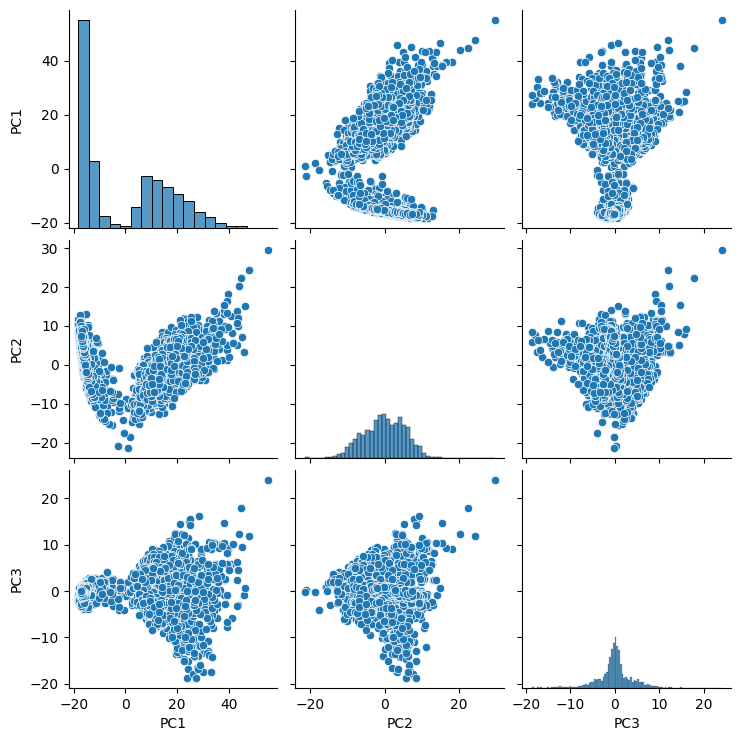

In [16]:
sns.pairplot(pca_df)

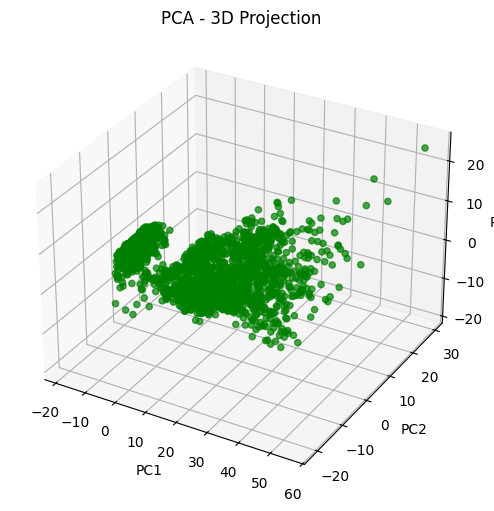

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='green', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - 3D Projection')
plt.show()